In [1]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time
from scipy import integrate

In [2]:
#Parámetros para simulación:
d = 3.844e8          #Distancia tierra-luna
a =  6.67e-11*5.9736e24/(d)**3
mu = 0.07349e24/5.9736e24 
w = 2.6617e-6        #Frecuencia orbita luna

#Evolución de la luna

def Luna(t):
    
    return np.array([np.cos(w*t),np.sin(w*t)])

In [3]:
#Los parámetros son r - radio, phi - ángulo, p_r - momento, p_phi - momento angular, t - tiempo.

def f0(r, phi, p_r, p_phi, t):     #Primera ecuación diferencial
    
    return p_r
    
def f1(r, phi, p_r, p_phi, t):     #Segunda ecuación diferencial
    
    return p_phi/r**2

def f2(r, phi, p_r, p_phi, t):     #Tercera ecuación diferencial     

    return p_phi**2/r**3 - a*(1/r**2+ mu/np.sqrt(1+r**2-2*r*np.cos(phi-w*t))**3)

def f3(r, phi, p_r, p_phi, t):     #Cuarta ecuación diferencial
    
    return -a*mu*r/np.sqrt(1+r**2-2*r*np.cos(phi-w*t))**3 * np.sin(phi-w*t)

In [4]:
def GetRK4(r0,t):

    h = (t[-1] - t[0])/(len(t)-1)
    
    print('h = ', h )
    
    #Evolución ecuaciones diferenciales
    
    r = np.zeros(len(t))      #Evolución para el radio
    phi = np.zeros(len(t))    #Evolución para el ángulo
    p_r = np.zeros(len(t))    #Evolución para el momento
    p_phi = np.zeros(len(t))  #Evolución para el momento angular
    
    #Condiciones iniciales
    
    r[0] = r0[0]      #Radio
    phi[0] = r0[1]    #Ángulo
    p_r[0] = r0[2]    #Momento 
    p_phi[0] = r0[3]  #Momento angular
    
    #Vectores K evolución de RK
    
    K0 = np.zeros(4)
    K1 = np.zeros(4)
    K2 = np.zeros(4)
    K3 = np.zeros(4)
    
    #Evolución de las funciones
    
    for i in tqdm(range(1,int(len(t)))):
          
        K0[0] = f0(r[i-1], phi[i-1], p_r[i-1], p_phi[i-1], t[i-1])  #1er coeficiente radio
        K0[1] = f1(r[i-1], phi[i-1], p_r[i-1], p_phi[i-1], t[i-1])  #1er coeficiente ángulo
        K0[2] = f2(r[i-1], phi[i-1], p_r[i-1], p_phi[i-1], t[i-1])  #1er coeficiente momento 
        K0[3] = f3(r[i-1], phi[i-1], p_r[i-1], p_phi[i-1], t[i-1])  #1er coeficiente momento angular

        K1[0] = f0(r[i-1] + 0.5*h*K0[0], phi[i-1] + 0.5*h*K0[1], p_r[i-1] + 0.5*h*K0[2], p_phi[i-1] + 0.5*h*K0[3], t[i-1] + 0.5*h)
        K1[1] = f1(r[i-1] + 0.5*h*K0[0], phi[i-1] + 0.5*h*K0[1], p_r[i-1] + 0.5*h*K0[2], p_phi[i-1] + 0.5*h*K0[3], t[i-1] + 0.5*h)
        K1[2] = f2(r[i-1] + 0.5*h*K0[0], phi[i-1] + 0.5*h*K0[1], p_r[i-1] + 0.5*h*K0[2], p_phi[i-1] + 0.5*h*K0[3], t[i-1] + 0.5*h)
        K1[3] = f3(r[i-1] + 0.5*h*K0[0], phi[i-1] + 0.5*h*K0[1], p_r[i-1] + 0.5*h*K0[2], p_phi[i-1] + 0.5*h*K0[3], t[i-1] + 0.5*h)

        K2[0] = f0(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], p_r[i-1] + 0.5*h*K1[2], p_phi[i-1] + 0.5*h*K1[3], t[i-1] + 0.5*h)
        K2[1] = f1(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], p_r[i-1] + 0.5*h*K1[2], p_phi[i-1] + 0.5*h*K1[3], t[i-1] + 0.5*h)
        K2[2] = f2(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], p_r[i-1] + 0.5*h*K1[2], p_phi[i-1] + 0.5*h*K1[3], t[i-1] + 0.5*h)
        K2[3] = f3(r[i-1] + 0.5*h*K1[0], phi[i-1] + 0.5*h*K1[1], p_r[i-1] + 0.5*h*K1[2], p_phi[i-1] + 0.5*h*K1[3], t[i-1] + 0.5*h)

        K3[0] = f0(r[i-1] + h*K2[0], phi[i-1] + h*K2[1], p_r[i-1] + h*K2[2], p_phi[i-1] + h*K2[3], t[i-1] + h)
        K3[1] = f1(r[i-1] + h*K2[0], phi[i-1] + h*K2[1], p_r[i-1] + h*K2[2], p_phi[i-1] + h*K2[3], t[i-1] + h)
        K3[2] = f2(r[i-1] + h*K2[0], phi[i-1] + h*K2[1], p_r[i-1] + h*K2[2], p_phi[i-1] + h*K2[3], t[i-1] + h)
        K3[3] = f3(r[i-1] + h*K2[0], phi[i-1] + h*K2[1], p_r[i-1] + h*K2[2], p_phi[i-1] + h*K2[3], t[i-1] + h)

        r[i] = r[i-1] + h*(K0[0] + 2*K1[0] + 2*K2[0] + K3[0])/6
        phi[i] = phi[i-1] + h*(K0[1] + 2*K1[1] + 2*K2[1] + K3[1])/6
        p_r[i] = p_r[i-1] + h*(K0[2] + 2*K1[2] + 2*K2[2] + K3[2])/6
        p_phi[i] = p_phi[i-1] + h*(K0[3] + 2*K1[3] + 2*K2[3] + K3[3])/6 
                  
    return r,phi,p_r,p_phi

In [5]:
#Condiciones iniciales

def mom_in(v,theta,phi):
    
    return v*np.cos(theta-phi)

def mom_an(r,v,theta,phi): 
    
    return r*v*np.sin(theta-phi)

r0 = 6.371e6    #Radio de la tierra
phi0 = 0.*np.pi/180    #Ángulo inicial
theta = 24*np.pi/180  
v = 11.158e3 
p_r0 = mom_in(v/d,theta,phi0)    #Momento inicial
p_phi0 = mom_an(r0/d,v/d,theta,phi0)    #Momento angular inicial

#Radio normalizado a dL, ángulo, momento, momento angular

D = [r0/d, phi0, p_r0, p_phi0]    

print(D)

[0.0165738813735692, 0.0, 2.651753438183179e-05, 1.9567732562101205e-07]


In [6]:
#Discretización

N = 60000
t = np.linspace(0.,600000.,N)

r, phi, p_r, p_phi = GetRK4(D, t)

  0%|                                                                                        | 0/59999 [00:00<?, ?it/s]

h =  10.000166669444491


100%|██████████████████████████████████████████████████████████████████████████| 59999/59999 [00:15<00:00, 3784.68it/s]


In [7]:
x_t, y_t = r*np.cos(phi), r*np.sin(phi)
x_l, y_l = Luna(t)

<IPython.core.display.Javascript object>


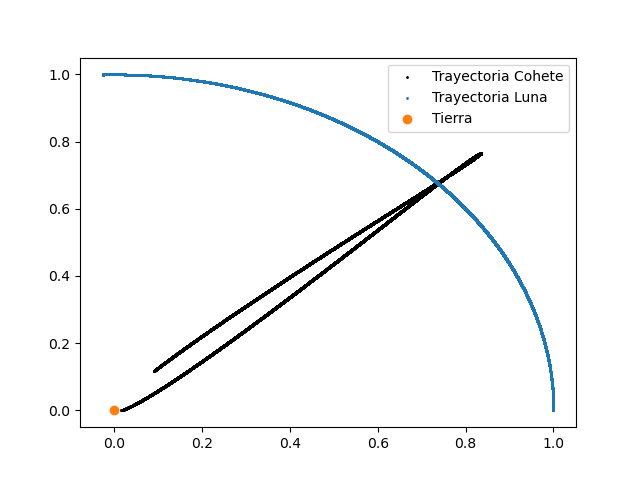

In [8]:
plt.figure()
plt.scatter(x_t,y_t,s = 1, label = 'Trayectoria Cohete', c='k')
plt.scatter(x_l,y_l,s = 1, label = 'Trayectoria Luna')
plt.scatter(0,0, label = 'Tierra')
plt.legend()

In [9]:
#Reducción del tiempo

def ReduceTime(t,factor):

    Newt = []
    
    for i in range(len(t)):
        
        if i%factor == 0:
            
            Newt.append(t[i])
            
    return np.array(Newt)

redt = ReduceTime(t,1000)    

In [10]:
#Reduce posiciones

def ReduceX(x,factor): 
    
    r = [] # initial condition
        
    for i in range(1,len(x)):
            
        if i%factor == 0:
                
            r.append(x[i])
    
    return np.array(r)

xtr = ReduceX(x_t,1000)
ytr = ReduceX(y_t,1000)

xlr = ReduceX(x_l,1000)
ylr = ReduceX(y_l,1000)

<IPython.core.display.Javascript object>


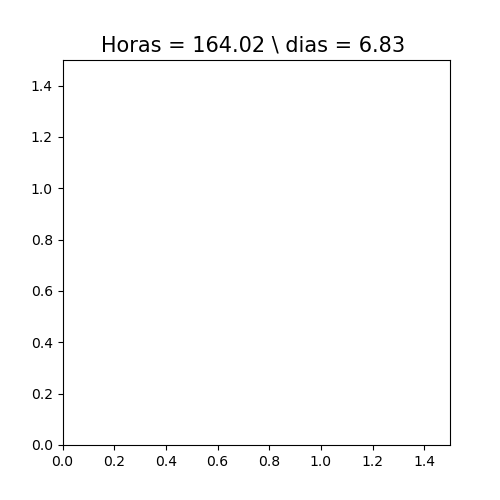

In [11]:
#Animaciones

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

#Función de inicio

def init():  
    
    ax.set_xlim(0,1.5)
    ax.set_ylim(0,1.5)
    
#Función de actualización

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'Horas = %.2f | dias = %.2f ' %(redt[i]*0.000278, redt[i]*0.000278/24), fontsize=15) 
    
    x_t = xtr[i]
    y_t = ytr[i]
    x_l = xlr[i]
    y_l = ylr[i]
    
    circle0 = plt.Circle((0,0), 0.1, color='b', fill = True, label = 'Tierra')
    circle = plt.Circle((x_t,y_t), 0.01, color='r', fill = True, label = 'Cohete')
    circle2 = plt.Circle((x_l,y_l), 0.03, color='k', fill = True, label = 'Luna')
    plot = ax.add_patch(circle)
    plot = ax.add_patch(circle2)
    plot = ax.add_patch(circle0)
    #ax.set_xlabel('x[m]')
    #ax.set_ylabel('y[m]')
    ax.legend()
    
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)
#Animation.save('Viaje_Luna.mp4')
plt.show()